# Anomaly Detection

In [1]:
 # pip install pyod

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eif as iso

In [8]:
df = pd.read_csv('imbd_log.csv')

### HBOS

In [9]:
from pyod.models.hbos import HBOS
import pandas as pd

# Supponendo che 'df' sia il tuo dataframe
# Inizializza il modello HBOS
numeric_df = df.select_dtypes(include=['number'])

# Inizializza il modello HBOS
hbos = HBOS()

# Adatta il modello ai dati
hbos.fit(numeric_df)

# Ottieni i punteggi degli outlier
outlier_pt_hbos = hbos.decision_function(numeric_df)

# Ottieni le etichette degli outlier
outliers_hbos = hbos.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_hbos'] = outlier_pt_hbos
df['outlier_hbos'] = outliers_hbos

print(df[['outlier_pt_hbos', 'outlier_hbos']])

        outlier_pt_hbos  outlier_hbos
0             20.542574             0
1             14.286763             0
2             12.334009             0
3             23.190280             1
4             24.300127             1
...                 ...           ...
149526         9.378729             0
149527        16.403796             0
149528        16.356439             0
149529         9.483305             0
149530        13.914544             0

[149531 rows x 2 columns]


In [46]:
# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_hbos'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

La percentuale di outlier nel dataframe è: 10.00%


### LOF

In [10]:
from pyod.models.lof import LOF
import pandas as pd

# Inizializza il modello LOF
lof = LOF()

# Adatta il modello ai dati
lof.fit(numeric_df)

# Ottieni i punteggi degli outlier
outlier_pt_lof = lof.decision_function(numeric_df)

# Ottieni le etichette degli outlier
outliers_lof = lof.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_lof'] = outlier_pt_lof
df['outlier_lof'] = outliers_lof

# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_lof'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

La percentuale di outlier nel dataframe è: 10.00%


### ABOD

In [48]:
from pyod.models.abod import ABOD
import pandas as pd

# Inizializza il modello ABOD
abod = ABOD()

# Supponendo che 'df' sia il tuo dataframe
# Rimuovi le righe con valori NaN o infiniti
df_clean = numeric_df.replace([np.inf, -np.inf], np.nan).dropna()

# Seleziona solo le variabili numeriche
numeric_df_clean = df_clean.select_dtypes(include=['number'])

# Ora puoi applicare il tuo modello di anomaly detection

# Adatta il modello ai dati
abod.fit(numeric_df_clean)

# Ottieni i punteggi degli outlier
outlier_scores = abod.decision_function(numeric_df_clean)

# Ottieni le etichette degli outlier
outliers = abod.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_abod'] = outlier_scores
df['outlier_abod'] = outliers

# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_abod'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encou

La percentuale di outlier nel dataframe è: 0.00%


In [49]:
df_abod = df.drop(columns=['outlier_pt_hbos', 'outlier_hbos', 'outlier_pt_lof', 'outlier_lof'])
# Rimuovi le righe con valori NaN o infiniti
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Seleziona solo le variabili numeriche
numeric_df_clean = df_clean.select_dtypes(include=['number'])

# Inizializza il modello ABOD
abod = ABOD()

# Adatta il modello ai dati
abod.fit(numeric_df_clean)

# Ottieni i punteggi degli outlier
outlier_scores = abod.decision_function(numeric_df_clean)

# Ottieni le etichette degli outlier
outliers = abod.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df_clean['outlier_pt_abod'] = outlier_scores
df_clean['outlier_abod'] = outliers

# Calcola la percentuale di outlier
outlier_percentage = (df_clean['outlier_abod'].sum() / len(df_clean)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

La percentuale di outlier nel dataframe è: 10.00%


### Confronto

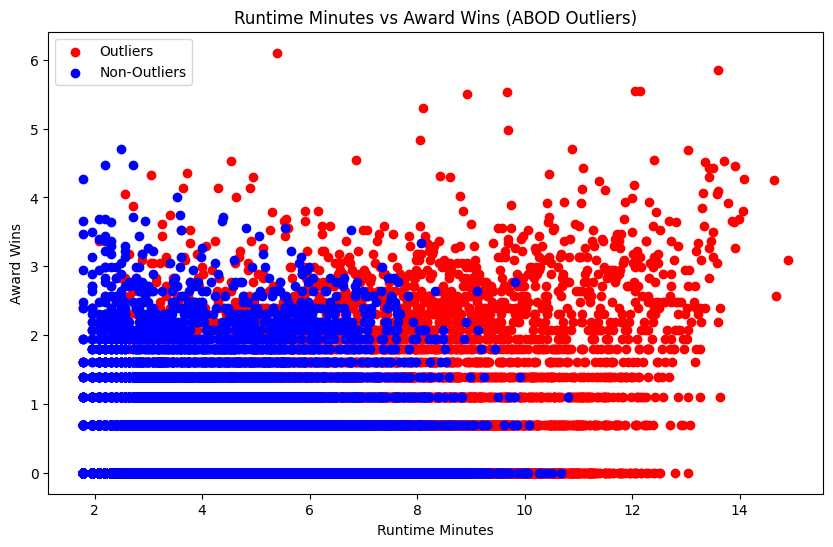

In [55]:
# Creare un grafico per visualizzare i dati con due colori diversi in base a se sono outlier o meno, sulle variabili 'runtimeMinutes' e 'awardWins'
plt.figure(figsize=(10, 6))

plt.scatter(df_clean[df_clean['outlier_abod'] == 1]['numVotes'], df_clean[df_clean['outlier_abod'] == 1]['awardWins'], color='red', label='Outliers')

# Plot non-outliers
plt.scatter(df_clean[df_clean['outlier_abod'] == 0]['numVotes'], df_clean[df_clean['outlier_abod'] == 0]['awardWins'], color='blue', label='Non-Outliers')

# Plot outliers

plt.xlabel('Runtime Minutes')
plt.ylabel('Award Wins')
plt.title('Runtime Minutes vs Award Wins (ABOD Outliers)')
plt.legend()
plt.show()

In [ ]:
# Confronta le colonne 'outlier_pt_hbos' e 'outlier_pt_lof'
corresponding_outliers = df[(df['outlier_hbos'] == 1) & (df['outlier_lof'] == 1) & (df['outlier_abod'] == 1)]

# Calcola il numero di outlier corrispondenti
num_corresponding_outliers = len(corresponding_outliers)

print(f"Il numero di outlier corrispondenti tra i due metodi è: {num_corresponding_outliers}")

#tra hbos e lof sono 3000 gli outlier corrispondenti

Il numero di outlier corrispondenti tra i due metodi è: 0


# Isolation Forest

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
clf = IsolationForest(random_state=0)
clf.fit(X_train)

In [ ]:
outliers = clf.predict(X_test)

In [ ]:
np.unique(outliers, return_counts=True)

In [ ]:
from pyod.models.iforest import IsolationForest

In [ ]:
clf = IsolationForest()
clf.fit(X)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

In [ ]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers==1)]), c='k')
plt.show()